# KNN

### Objective: 
The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

### Need to Classify the animal type

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [3]:
df = pd.read_csv("./Zoo.csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


## EDA

#### Correcting column names

In [8]:
df1.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [9]:
df1.rename(columns={"animal name": "animal_name"}, inplace=True)

In [10]:
df1.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


### Check for duplicates

In [11]:
df1[df1.duplicated(keep=False)]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


### -> No duplicates detected

### Confirming if most of the columns are binary values

In [12]:
cols = df1.columns
for col in cols:
    print(f"Column {col}: {df1[col].unique()}")

Column animal_name: ['aardvark' 'antelope' 'bass' 'bear' 'boar' 'buffalo' 'calf' 'carp'
 'catfish' 'cavy' 'cheetah' 'chicken' 'chub' 'clam' 'crab' 'crayfish'
 'crow' 'deer' 'dogfish' 'dolphin' 'dove' 'duck' 'elephant' 'flamingo'
 'flea' 'frog' 'fruitbat' 'giraffe' 'girl' 'gnat' 'goat' 'gorilla' 'gull'
 'haddock' 'hamster' 'hare' 'hawk' 'herring' 'honeybee' 'housefly' 'kiwi'
 'ladybird' 'lark' 'leopard' 'lion' 'lobster' 'lynx' 'mink' 'mole'
 'mongoose' 'moth' 'newt' 'octopus' 'opossum' 'oryx' 'ostrich' 'parakeet'
 'penguin' 'pheasant' 'pike' 'piranha' 'pitviper' 'platypus' 'polecat'
 'pony' 'porpoise' 'puma' 'pussycat' 'raccoon' 'reindeer' 'rhea'
 'scorpion' 'seahorse' 'seal' 'sealion' 'seasnake' 'seawasp' 'skimmer'
 'skua' 'slowworm' 'slug' 'sole' 'sparrow' 'squirrel' 'starfish'
 'stingray' 'swan' 'termite' 'toad' 'tortoise' 'tuatara' 'tuna' 'vampire'
 'vole' 'vulture' 'wallaby' 'wasp' 'wolf' 'worm' 'wren']
Column hair: [1 0]
Column feathers: [0 1]
Column eggs: [0 1]
Column milk: [1 0]

In [13]:
df1[df1["animal_name"].duplicated(keep=False)]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


#### Frog is not duplicated, varies with being venomous or not

In [14]:
df1.nunique()

animal_name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

## Check for null values

In [15]:
df1.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

### -> no null values detected so far

### Automating EDA process

In [16]:
import ydata_profiling as pp

In [17]:
report = pp.ProfileReport(df1)

In [18]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/18 [00:00<?, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 99.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The report shows most of the features have high correlation. Feature venomous is highly imbalanced.

### Dropping the feature animal_name as its not useful in predicting the animal type

In [19]:
df2 = df1.copy()
df2.head(2)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [20]:
df2.drop(columns="animal_name", inplace=True)
df2.head(2)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


## Visualizing the data

### Histogram plot

In [21]:
%matplotlib inline

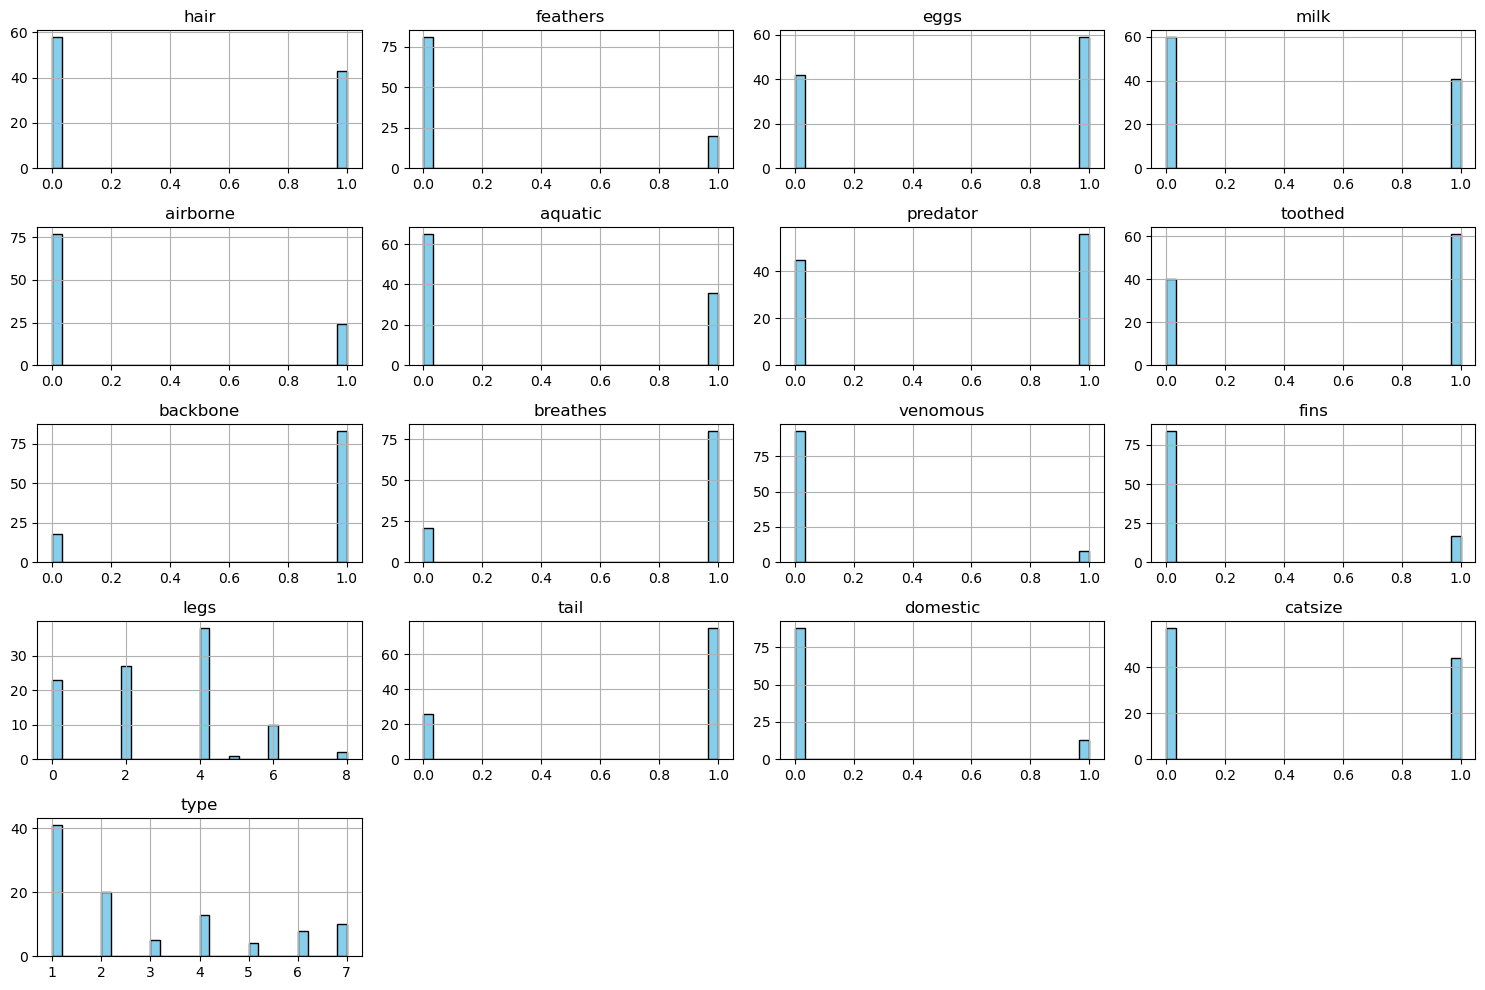

In [22]:
df2.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Boxplot for outlier detection 

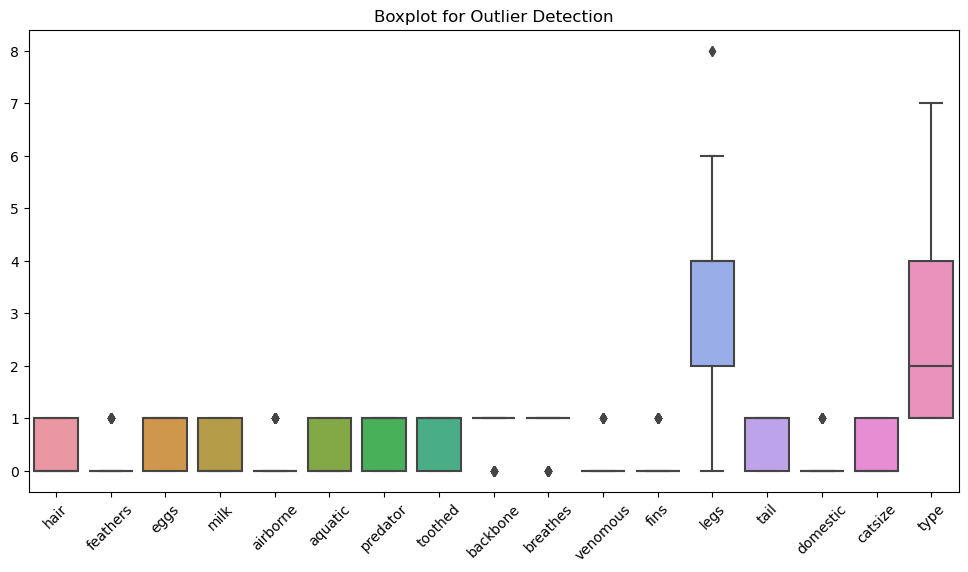

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df2)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

#### Outlier detection has to be  performed on the only continuous numeric feature legs using the Interquartile Range (IQR) method. Since most other features are binary, outlier detection is not applicable to them. 

In [24]:
from scipy.stats import iqr

### Function to detect and remove outliers - only on feature legs (numeric feature)

In [25]:
def remove_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR
    return df[df[col].between(lower, upper)]

In [26]:
df3 = remove_outliers_iqr(df2, 'legs')

In [27]:
print(f"Rows before outlier removal: {df2.shape[0]}, after: {df3.shape[0]}")

Rows before outlier removal: 101, after: 99


In [28]:
print(df2['type'].value_counts())

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [29]:
print(df3['type'].value_counts())

type
1    41
2    20
4    13
7     8
6     8
3     5
5     4
Name: count, dtype: int64


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      99 non-null     int64
 1   feathers  99 non-null     int64
 2   eggs      99 non-null     int64
 3   milk      99 non-null     int64
 4   airborne  99 non-null     int64
 5   aquatic   99 non-null     int64
 6   predator  99 non-null     int64
 7   toothed   99 non-null     int64
 8   backbone  99 non-null     int64
 9   breathes  99 non-null     int64
 10  venomous  99 non-null     int64
 11  fins      99 non-null     int64
 12  legs      99 non-null     int64
 13  tail      99 non-null     int64
 14  domestic  99 non-null     int64
 15  catsize   99 non-null     int64
 16  type      99 non-null     int64
dtypes: int64(17)
memory usage: 13.9 KB


#### -> Outliers in feature legs have been removed, 2 rows from original dataset is dropped.

### Correlation Analysis

In [31]:
corr_matrix = df3.corr()
corr_matrix

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.440902,-0.835370,0.876741,-0.210383,-0.477507,-0.141382,0.482102,0.163288,0.440902,-0.082712,-0.290916,0.473885,0.040272,0.202343,0.465532,-0.554418
feathers,-0.440902,1.000000,0.423038,-0.423038,0.654643,-0.056345,-0.096456,-0.637492,0.220914,0.253165,-0.138789,-0.229097,-0.194785,0.292453,0.027839,-0.136372,-0.185560
eggs,-0.835370,0.423038,1.000000,-0.958368,0.379910,0.364390,0.014976,-0.663598,-0.369147,-0.371964,0.151918,0.165321,-0.234354,-0.205488,-0.158845,-0.545769,0.704662
milk,0.876741,-0.423038,-0.958368,1.000000,-0.379910,-0.364390,-0.014976,0.621431,0.369147,0.423038,-0.231917,-0.165321,0.277419,0.205488,0.158845,0.587141,-0.724897
airborne,-0.210383,0.654643,0.379910,-0.379910,1.000000,-0.171814,-0.288322,-0.619785,-0.135826,0.284627,0.027864,-0.257568,0.077997,0.003288,0.059214,-0.353039,0.047222
aquatic,-0.477507,-0.056345,0.364390,-0.364390,-0.171814,1.000000,0.378043,0.062317,0.037687,-0.627765,0.125722,0.615706,-0.408306,-0.007860,-0.224960,-0.136492,0.331906
predator,-0.141382,-0.096456,0.014976,-0.014976,-0.288322,0.378043,1.000000,0.155477,0.095191,-0.257217,0.093528,0.200490,-0.157819,0.029713,-0.305778,0.145103,0.026387
toothed,0.482102,-0.637492,-0.663598,0.621431,-0.619785,0.062317,0.155477,1.000000,0.556281,-0.086741,-0.025372,0.359372,-0.141540,0.306159,0.060876,0.356391,-0.446763
backbone,0.163288,0.220914,-0.369147,0.369147,-0.135826,0.037687,0.095191,0.556281,1.000000,0.189157,-0.200046,0.199912,-0.363080,0.755382,0.089455,0.384735,-0.812891
breathes,0.440902,0.253165,-0.371964,0.423038,0.284627,-0.627765,-0.257217,-0.086741,0.189157,1.000000,-0.155642,-0.638102,0.445738,0.054981,0.121137,0.237882,-0.521952


### correlation matrix heatmap

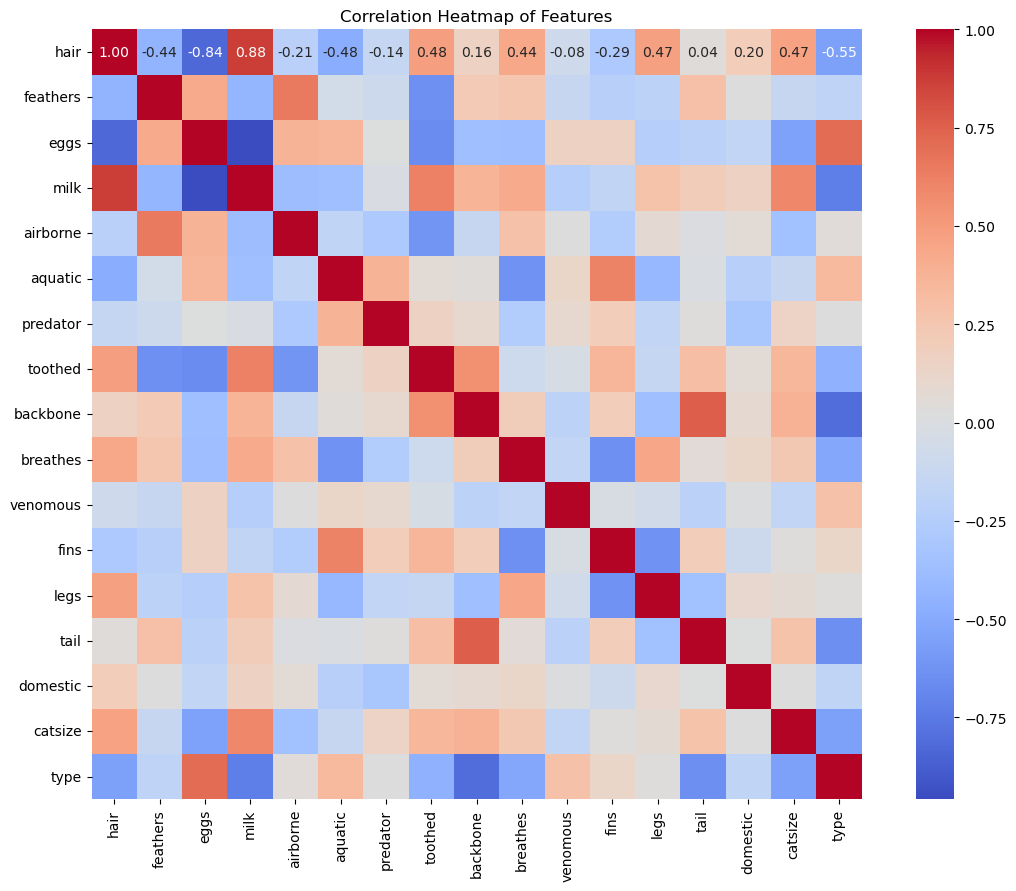

In [32]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

#### Interpretation:
Features milk and hair seem to be highly correlated, showing positive relationship. 

Features milk and eggs seem to be highly correlated, showing negative relationship. 

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      99 non-null     int64
 1   feathers  99 non-null     int64
 2   eggs      99 non-null     int64
 3   milk      99 non-null     int64
 4   airborne  99 non-null     int64
 5   aquatic   99 non-null     int64
 6   predator  99 non-null     int64
 7   toothed   99 non-null     int64
 8   backbone  99 non-null     int64
 9   breathes  99 non-null     int64
 10  venomous  99 non-null     int64
 11  fins      99 non-null     int64
 12  legs      99 non-null     int64
 13  tail      99 non-null     int64
 14  domestic  99 non-null     int64
 15  catsize   99 non-null     int64
 16  type      99 non-null     int64
dtypes: int64(17)
memory usage: 13.9 KB


## KNN Model

### Dataset split into training and testing sets ( using an 80-20 split).

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
df3.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


In [39]:
X = df3.iloc[:, :16]
y = df3.iloc[:,16]

In [40]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [41]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [43]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((79, 16), (20, 16), (79,), (20,))

In [44]:
# Convert to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values

### Building the model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [47]:
model.fit(X_train_np,y_train)

KNeighborsClassifier()

#### Predict and get the training and testing metricts

In [48]:
yhat_train = model.predict(X_train_np)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [50]:
print("Test Accuracy:", accuracy_score(y_train,yhat_train))
print("Training classification_report: ")
print(classification_report(y_train,yhat_train))

Test Accuracy: 0.9493670886075949
Training classification_report: 
              precision    recall  f1-score   support

           1       0.94      0.97      0.96        33
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         3
           4       0.85      1.00      0.92        11
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         8

    accuracy                           0.95        79
   macro avg       0.83      0.85      0.84        79
weighted avg       0.92      0.95      0.93        79



In [51]:
cm = confusion_matrix(y_train, yhat_train)
cm

array([[32,  0,  0,  1,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

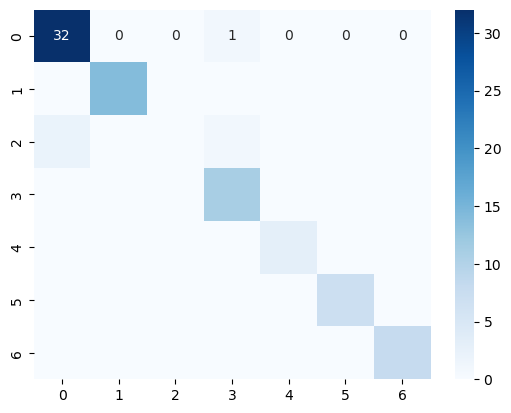

In [52]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [53]:
yhat_test = model.predict(X_test_np)

In [54]:
print("Test Accuracy:", accuracy_score(y_test, yhat_test))
print("Testing classification_report: ")
print(classification_report(y_test,yhat_test))

Test Accuracy: 0.85
Testing classification_report: 
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.40      1.00      0.57         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.85        20
   macro avg       0.73      0.81      0.75        20
weighted avg       0.84      0.85      0.83        20



In [55]:
cm = confusion_matrix(y_test,yhat_test)
cm

array([[7, 0, 0, 1, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=int64)

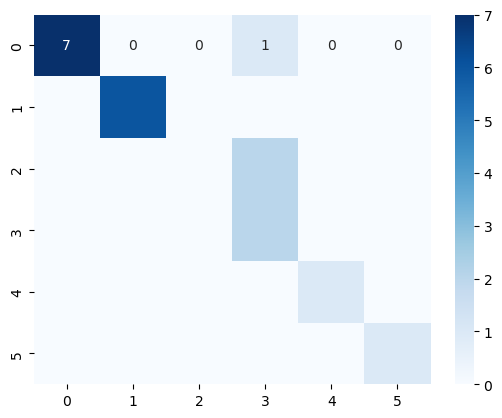

In [56]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

### Interpretation

Without scaling and hyperparamter tuning:
Test set classification report accuracy: 0.85 (85%). But macro avg F1-score was lower: 0.75, also there is a class imbalance issue:Class 3 had 0 precision, recall, and F1-score

Here KNN is’t treating all features equally in the distance calculation without scaling — especially since legs would have disproportionate influence without scaling.

## Decision Boundary Visualization 

In [76]:
X_vis = df3[['eggs', 'aquatic']].values
y_vis = df3['type'].values

In [77]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_vis, y_vis)

KNeighborsClassifier()

In [78]:
# mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [79]:
# Predict on mesh grid
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


In [80]:
print("Unique predicted classes in meshgrid:", np.unique(Z))

Unique predicted classes in meshgrid: [1 2 4]


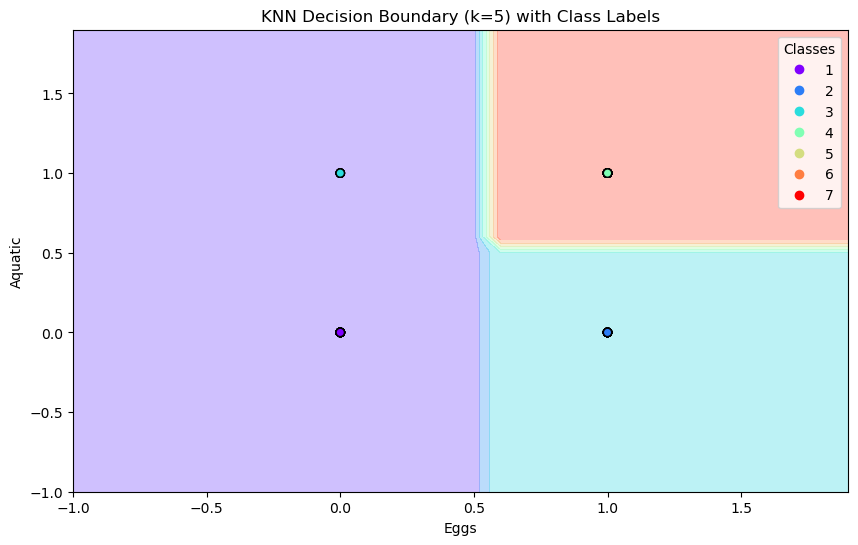

In [81]:
# Plot 
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.rainbow)
plt.xlabel('Eggs')
plt.ylabel('Aquatic')
plt.title('KNN Decision Boundary (k=5) with Class Labels')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

#### Interpreation:

* Since plotting decision boundaries in higher dimensions is not visually feasible, two features — eggs and aquatic — were selected based on their observed relationship with the target class (type) from the correlation analysis. This helps in illustrating how the K-Nearest Neighbors classifier differentiates animal types in this two-dimensional feature space.

* The decision boundary plot reveals that the classifier forms multiple distinct regions in the feature space, each representing a different predicted animal type (class labels 1 to 7). The boundaries between these regions indicate the threshold where the classifier changes its prediction based on the majority vote from the nearest neighbors.

### Hperparameter Tuning - with gridsearchcv

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#### Scale the data 

In [58]:
scaler = StandardScaler()

In [59]:
# pipeline: scaling + KNN
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', KNeighborsClassifier())
])

In [60]:
param_grid = {
    'knn__n_neighbors': list(range(1, 20)),      # Trying K values from 1 to 19
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

In [61]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [62]:
grid.fit(X_train_np, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [63]:
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Best cross-validated accuracy: 0.9741666666666667


## Rebuilding the model

In [72]:
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2, metric='manhattan'))
])

In [73]:
final_pipeline.fit(X_train_np, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=2))])

In [74]:
y_pred = final_pipeline.predict(X_test_np)

In [75]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1

    accuracy                           0.95        20
   macro avg       0.78      0.83      0.80        20
weighted avg       0.92      0.95      0.93        20



### Interpretation:

With scaling + best hyperparameters:
Test accuracy: 95%

All classes performed better, class 3 improved.

Scaling and tuned hyperparameters improved overall accuracy and fairness in class predictions


## Interview Questions

 ### K-Nearest Neighbors (KNN): Key Hyperparameters and Distance Metrics

### 1. Key Hyperparameters in KNN

The performance of the K-Nearest Neighbors (KNN) algorithm largely depends on the selection of certain hyperparameters. The important hyperparameters in KNN are:

* n\_neighbors (k): Specifies the number of nearest neighbors to consider when making predictions.
  A smaller value of k makes the model sensitive to noise.
  A larger value can make the model more generalized but might lead to underfitting.

* weights: Determines the influence each neighbor has on the prediction.
  Common options:

  * 'uniform': All neighbors have equal influence.
  * 'distance': Closer neighbors have a higher influence on the prediction.

* metric: The distance function used to calculate the proximity between data points.
  Common metrics include:

  * 'minkowski' (default)
  * 'euclidean'
  * 'manhattan'
  * 'chebyshev'
  * Custom-defined functions.

* p: A parameter used with the Minkowski distance metric.

  * p = 1 → Manhattan distance
  * p = 2 → Euclidean distance

#### 2. Distance Metrics Used in KNN

The KNN algorithm uses distance metrics to determine the similarity or dissimilarity between data points. Commonly used distance metrics are:

* Euclidean Distance:
  The most widely used distance metric for continuous variables. It is the straight-line distance between two points in Euclidean space.
  Formula:
  d(p, q) = √∑(pi − qi)²

* Manhattan Distance (L1 Norm):
  Also known as taxicab or city-block distance. It is the sum of the absolute differences between the coordinates of two points.
  Formula:
  d(p, q) = ∑|pi − qi|

* Minkowski Distance:
  A generalized form of both Euclidean and Manhattan distances. It is controlled by the parameter p.
  Formula:
  d(p, q) = (∑|pi − qi|^p)^(1/p)

* Chebyshev Distance:
  Measures the maximum absolute difference along any coordinate dimension.
  Formula:
  d(p, q) = max|pi − qi|

* Cosine Similarity (or Cosine Distance):
  Measures the cosine of the angle between two non-zero vectors. It is often used for high-dimensional data such as text analysis.

* Hamming Distance:
  Used for categorical variables. It counts the number of positions at which corresponding elements are different.
